In [1]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



ERROR: Error in library("pracma"): there is no package called ‘pracma’


## Basic operation in R

In [31]:
dim_list<-vector("numeric", 7)
# remove one element in the list
m = seq(1,5,1)
m <- m[-5]
print(m)
# set operation:
n<-rep(2,4)
print(n)
print(intersect(m,n))
union(m,n)
print('1' %in% m )
# create table with colnames
table1<-matrix(1,2,2)
colnames(table1) <- c('nodeid','com id')
print(table1)
# record running time
start.time <- Sys.time()
end.time <- Sys.time()
end.time-start.time
# save plots
i = 10
png(paste('./test',i,'.png',sep=''))
plot(hist(m))
dev.off()

[1] 1 2 3 4
[1] 2 2 2 2
[1] 2


[1] 1 2 3 4

[1] TRUE
     nodeid com id
[1,]      1      1
[2,]      1      1


Time difference of 0.00090909 secs

pdf 
  2

### Sort function

In [36]:
m <- c(5,seq(1,4),10)
print(m)
n<-sort(m,decreasing=TRUE, index.return=FALSE)
print(n)
# get the 5th largest element's index
#print(n$x[5])

[1]  5  1  2  3  4 10
[1] 10  5  4  3  2  1


### Construct a list with specific pattern

In [38]:
m<-seq(1,5)
n<-lapply(m,function(x) c(10, x))
#print(n)
cal_n <- do.call('c',lapply(m,function(x) c(10, x))) 
print(cal_n)

 [1] 10  1 10  2 10  3 10  4 10  5


In [2]:
library(magrittr)
# Pipes can be chained as well
str1<-"test1 "
str2<-"test2"
str1 %>% paste(str2) %>% toupper()
x <- c(0.109, 0.359, 0.63, 0.996, 0.515, 0.142, 0.017, 0.829, 0.907)
x %>% log() %>%
    diff() %>%
    exp() %>%
    round(1) 

[1] "TEST1  TEST2"

[1]  3.3  1.8  1.6  0.5  0.3  0.1 48.8  1.1

## Basic operation in igraph

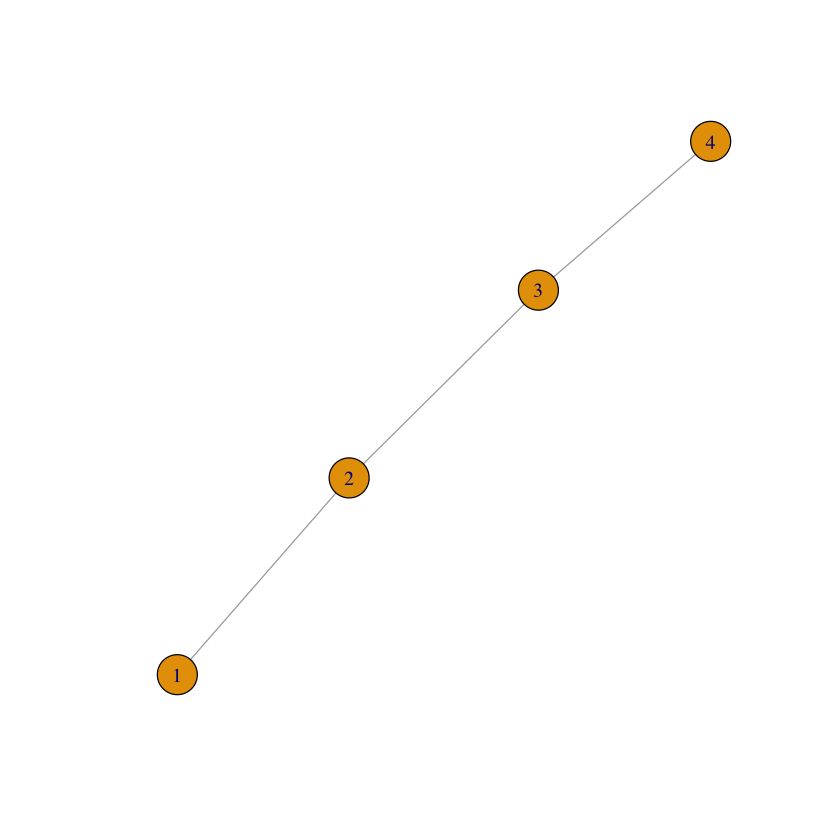

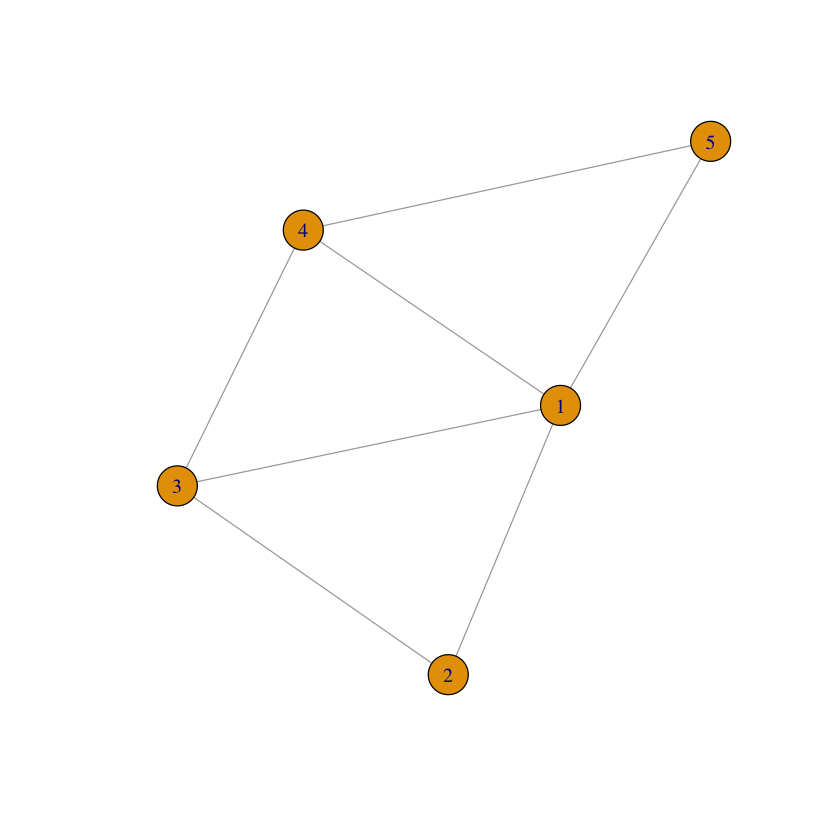

In [3]:
# set node id,so you can track it even inside the induced subgraph
# delete vertice
library(igraph)
g<-make_ring(5,directed = FALSE)
#plot(g)
del_g<-delete.vertices(g,5)
plot(del_g)
# construct graph from edgelist
# add edgelist
final_g <- add.edges(g,c(1,3,1,4))
plot(final_g)

In [1]:
# add property
#get.vertex.attribute(g,"vid")
print(g)
V(g)$vid <- seq(vcount(g),1)
#print(get.vertex.attribute(g,"vid"))
del_g<-delete.vertices(g,3)
plot(del_g,V(del_g)$vid)
#plot(del_g,vertex.label=NA)
#plot(del_g)
print(V(del_g)$vid)

ERROR: Error in print(g): object 'g' not found


## Q1

In [18]:

FB <- read_graph("facebook_combined.txt",format="edgelist",directed=FALSE)
is.connected(FB)

[1] TRUE

## Q2

In [20]:
print(diameter(FB, directed = FALSE, unconnected = FALSE))

[1] 8


## Q3


[1] 43.69101


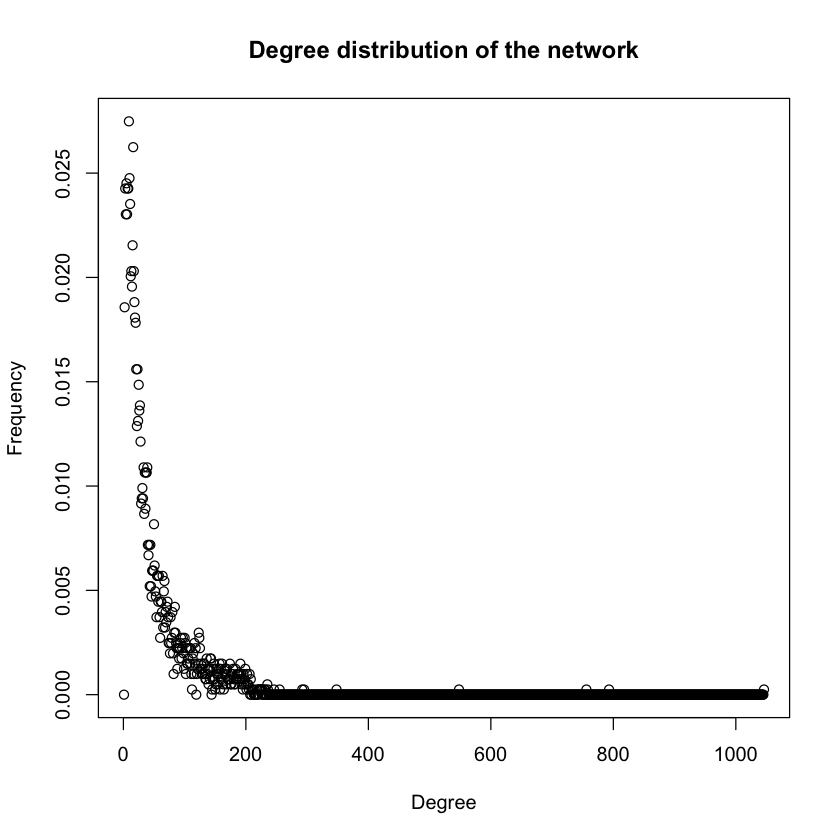

In [26]:
plot(degree.distribution(FB),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
print(mean(degree(FB)))

## Q4


[1] "slope = -1.18"


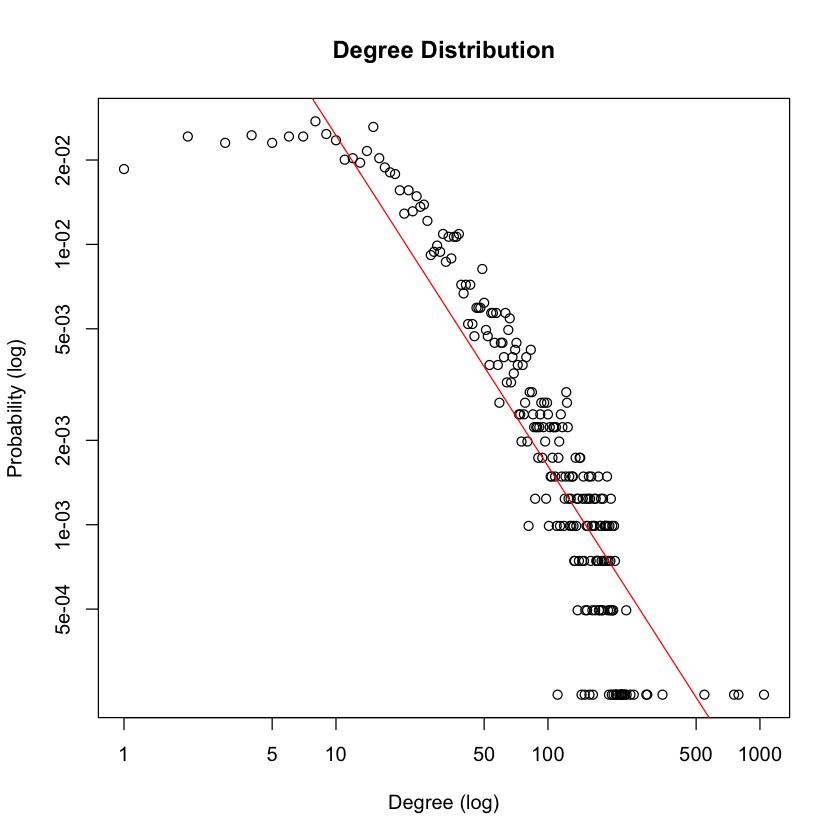

In [65]:
fit_power_law = function(graph) {
    # calculate degree
    d = degree(graph, mode = "all")
    dd = degree.distribution(graph, mode = "all", cumulative = FALSE)
    degree = 1:max(d)
    probability = dd[-1]
    # delete blank values
    nonzero.position = which(probability != 0)
    probability = probability[nonzero.position]
    degree = degree[nonzero.position]
    reg = lm(log(probability) ~ log(degree))
    cozf = coef(reg)
    power.law.fit = function(x) exp(cozf[[1]] + cozf[[2]] * log(x))
    alpha = cozf[[2]]
    R.square = summary(reg)$r.squared
    print(paste("slope =", round(alpha, 3)))
    
    # plot
    plot(probability ~ degree, log = "xy", xlab = "Degree (log)", ylab = "Probability (log)", 
        col = 1, main = "Degree Distribution")
    #abline(mod <- lm(log(probability) ~ log(degree)))
    curve(power.law.fit, col = "red", add = T, n = length(d))
    
}


fit_power_law(FB)


## Q5

In [96]:
FB_neighbor1=neighbors(FB, 1, mode = "total")
FB_id1=induced_subgraph(FB, c(1,FB_neighbor1), impl ="auto")
vcount(FB_id1)
ecount(FB_id1)

[1] 347


[1] 348

[1] 2866

## Q6

In [95]:
print(diameter(FB_id1, directed = FALSE, unconnected = FALSE))

[1] 2


## Q8

In [101]:
core=c()
deg=c()
for( v in V(FB)){
    if(length(neighbors(FB, v, mode = "total"))>200){
        core=append(core,v)
        deg=append(deg,degree(FB,v))
        }
}
print(length(core))
print(mean(deg))

[1] 40
[1] 279.375


[1] 1 2 3 4 5


In [9]:
# properties in the graph
g<-make_ring(5)
print(transitivity(g))
print(graph.density(g))

[1] 0
[1] 0.5


In [13]:
# set color and size for nodes
g3<-make_full_graph(5)
imc = infomap.community(g3)
colors = rainbow(max(membership(imc))+1)
nodes_colors = colors[1:(length(colors)-1)]
V(g3)$color = nodes_colors[membership(imc)] 
V(g3)$size= 5
V(g3)[1]$color = colors[length(colors)] 
V(g3)[1]$size = 15
#core_nodeid = which(V(sub_graph)$vid == 

In [51]:
#color<-rainbow(5)
#color[1]

[1] "#FF0000FF" "#CCFF00FF" "#00FF66FF" "#0066FFFF" "#CC00FFFF"

### Homogeneity
1. A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. 

Here C is the classes, K is the clusters.
[//]: <img src="homogeneity.png"/>
### Completeness 
1. A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
<img src="completeness.png"/>

In [4]:
#install.packages('entropy')
library('entropy')
data = c(1,1,2)
entropy(table(data))
print(table(data))
# calculate entropy
entropy(c(2,2))
entropy.empirical(c(1,2))

ERROR: Error in library("entropy"): there is no package called ‘entropy’


## Visualization graphs with interaction:
1. tkplot
2. visNetwork https://datastorm-open.github.io/visNetwork/options.html
3. gephi

In [ ]:
tkplot(g)

In [6]:
# Rstudio
install.packages('visNetwork')
library(visNetwork)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
